# <font color=navy> Lecture 1. 데이터의 탐색과 요약 </font>


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt


data_path = "../data/" # data가 저장되어 있는 경로로 각자 수정 필요 

## 1.1 정형 데이터와 측정 척도의 종류
### 정형화된 데이터의 요소 
- 비정형 데이터 
    - 이미지: RGB 컬러 정보를 담고 있는 픽셀의 집합체 
    - 텍스트: 무의미한 문자를 순서대로 나열한 배열 
    - 웹페이지 방문내역: 사용자가 웹페이지를 이용하면서 만들어낸 일련의 반응들을 배열 형태로 모아놓은 것 
- 정형 데이터 
    - 원시데이터(raw data)를 가공하여 활용 가능한 형태의 정보로 변환하여 만들어낸 데이터 
    - Example
        - 한 문서 안에 포함된 긍정 단어의 개수 
        - 사용자의 시간대별 웹페이지 방문 비율
        - 웹페이지 방문자의 평균연령 
        
- 스프레드 시트와 같은 형태의 테이블 데이터로 정리하여 통계 분석에 활용

### Example: 살인율

`state.csv`는 미국 각 주의 인구 10만 명당 연간 살인 사건의 수를 보여주고 있다. 

In [5]:
state = pd.read_csv('data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### 측정척도의 종류
척도의 종류에 따라 데이터를 분석하고 예측을 모델링하는 통계적 방법이 달라진다. 

#### 범주형 데이터 (categorical data)
가능한 범주 안의 값만 취할 수 있다. 
- 명목척도(nominal scale)
    - 전공: 경영학/인문학/교육학
    - TV 스크린 종류: 플라즈마/LCD/LED

- 순서척도(ordinal scale)<br>
   값들 사이에 분명한 수위가 있는 범주형 데이터
    - 직급: 대리/과장/부장/임원
    - 영화평점: 1/2/3/4/5
        

#### 수치형 데이터 (quantitative data)
- 연속형 데이터 (continuous data) <br>
    일정 범위 안에서 어떤 값이든 취할 수 있는 데이터 
    - 풍속, 지속시간, 온도, 키, 매출액 
- 이산형 데이터 (discrete data)<br>
    정수 값만 취할 수 있는 데이터 
    - 사건의 발생 빈도, 횟수 

#### Example
- M&M 초콜렛의 색깔
- 기온
- 셔츠 사이즈 (S, M, L, XL)
- S 사이즈 셔츠의 개수 
- 도시명 

####  수치형으로 보이지만 아닌 것?
- 범주를 나타내는 숫자<br>
    Ex) 1-male, 0-female

- 측정한 자료가 아니라 label을 나타내는 숫자<br>
    Ex) 학번 
- Hint: 값들의 평균이 의미가 있는지 체크! 
    - 0.5 = (male)과 (female)의 평균??

## 1.2 수치형 데이터의 요약
### 1.2.1 중심위치 측도
- 수치형 변수의 대부분의 값이 어디쯤 위치하는가?
- 대표값은 무엇인가? 


#### 평균 (mean)
- 모든 값의 총합을 값의 개수로 나눈 값
 $$\bar x = \frac 1 n \sum_{i=1}^n x_i $$

In [6]:
state['Murder.Rate'].mean()

4.066

In [7]:
state['Population'].mean()

6162876.3

#### 중앙값, 중위수 (median)
  
- 데이터를 크기에 따라 늘어 놓았을 때 가운데 위치한 값 

In [8]:
state['Murder.Rate'].median()

4.0

In [9]:
state['Population'].median()

4436369.5

#### 평균 vs. 중위수
- 자료에 극단값이 포함되어 있거나 분포가 지나치게 비대칭 일 경우, 중위수가 중심위치를 측정하는 데에 있어서 선호된다.(연소득, 재산자료, 집값)


<img src="https://dimg.donga.com/wps/SPORTS/IMAGE/2020/05/03/100895323.2.jpg" width=400>

In [10]:
## 극단값의 영향 
x=pd.Series(np.arange(10))
print("Mean: %.2f, Median: %.2f" %(x.mean(), x.median()))

Mean: 4.50, Median: 4.50


In [11]:
x[0]=100
print("Mean: %.2f, Median: %.2f" %(x.mean(), x.median()))

Mean: 14.50, Median: 5.50


#### 사분위수 

- 데이터를 오름차순으로 정렬했을 때 25%($Q_1$), 50%($Q_2$), 75%($Q_3$)에 해당하는 값 
- 대략적으로 데이터의 중간 50%가 $Q_1$에서 $Q_3$ 사이에 들어간다.

In [12]:
state['Murder.Rate'].quantile([0.25,0.5,0.75])

0.25    2.425
0.50    4.000
0.75    5.550
Name: Murder.Rate, dtype: float64

In [13]:
state['Population'].quantile([0.25,0.5,0.75])

0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

#### 십분위수 

<img src="http://kostat.go.kr/incomeNcpi/income/img_income/contimg18.png" width=300>

| 연령구분별       | 분배지표                | | 2018년   |
|----------------|-------------------------|----------|--------|
|  근로연령인구(18~65세)              | 균등화 평균소득(만원,10분위)       | 1분위      | 649    |
|                |                         | 2분위      | 1,499  |
|                |                         | 3분위      | 2,027  |
|                |                         | 4분위      | 2,488  |
|                |                         | 5분위      | 2,941  |
|                |                         | 6분위      | 3,445  |
|                |                         | 7분위      | 4,061  |
|                |                         | 8분위      | 4,849  |
|                |                         | 9분위      | 6,061  |
|                |                         | 10분위     | 10,086 |
|                | 균등화 소득 10분위별 경계값(단위:만원) | p10      | 1,185  |
|                |                         | p20      | 1,786  |
|                |                         | p30      | 2,253  |
|                |                         | p40      | 2,722  |
|                |                         | p50      | 3,182  |
|                |                         | p60      | 3,738  |
|                |                         | p70      | 4,426  |
|                |                         | p80      | 5,351  |
|                |                         | p90      | 6,973  |

In [14]:
state['Population'].quantile(np.arange(0,1.1,0.1))

0.0      563626.0
0.1      889558.6
0.2     1353913.0
0.3     2508139.4
0.4     3014731.8
0.5     4436369.5
0.6     5457149.4
0.7     6419552.5
0.8     8940611.8
0.9    12715204.3
1.0    37253956.0
Name: Population, dtype: float64


### 1.2.2 변이 측도
변이(variability)는 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 측도 

#### 분산 (variance)
 $$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar x)^2 }{n-1}$$

In [15]:
state['Population'].var()

46898327373394.445

#### 표준편차 (standard deviation)

- 원래의 자료에서 사용된 단위와 동일한 단위로 측정되므로  분산보다 해석이 용이
    $$s=\sqrt{s^2}$$
    

In [16]:
state['Population'].std()

6848235.347401142

#### Note: 자유도 (n-1)
- 왜 분산을 계산할 때 데이터의 개수(n)가 아니라 n-1로 나누는가? 
- 자유도의 개념
    - 분산을 계산하기 위해서는 평균을 먼저 계산해야 하기 때문에 제약조건이 하나 있는것
    - 데이터 하나의 정보를 소실한 상태로 분산을 계산 
- n-1를 분모로 하는 분산이 비편향(unbiased) 추정량


#### 사분위수 범위 (interquartile range; IQR)
- Q1과 Q3의 차이
- 자료의 중간 50%의 범위
- 분산, 표준편차 등은 극단값에 민감한데 비해 IQR은 상대적으로 덜 민감 



In [17]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0



### 1.2.3 그래프를 사용한 요약 
#### Boxplot
- Q1, Q2, Q3를 기준으로 대략적인 자료의 분포 시각화
- 이상치 판단
    - 하한선:  Q1  - 1.5*IQR
    - 상한선:  Q3  + 1.5*IQR
    
    <img src="https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png" width=500>

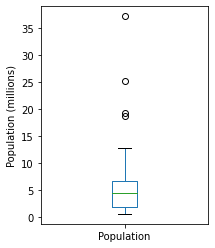

In [18]:
ax = (state.Population/1000000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')
plt.show()

#### 히스토그램(Histogram)
- 모집단 분포의 형태, 중심위치, 변이를 시각화 
- 데이터의 범위를 동일한 간격의 구간으로 나누어 해당 구간에 위치하는 데이터의 개수로 시각화 
    


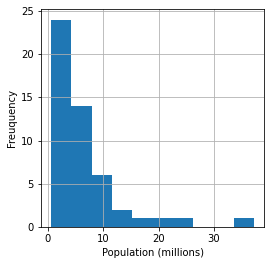

In [19]:
ax = (state.Population/1000000).hist(bins = 10, figsize=(4, 4))
ax.set_ylabel('Freuquency')
ax.set_xlabel('Population (millions)')
plt.show()

#### 밀도 추정(Density estimate)

- 막대기 형태의 그래프인 히스토그램을 연속된 곡선으로 나타낸 그림 
- 커널밀도추정 방법으로 추정 


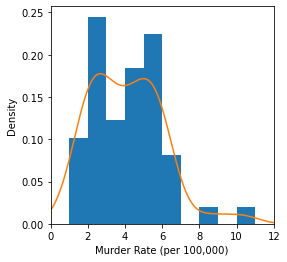

In [20]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.show()


#### Q-Q Normality Plot
- 자료가 정규분포에 얼마나 근접한지 판단
- 점들이 직선에 가까울 수록 정규분포에 근사 



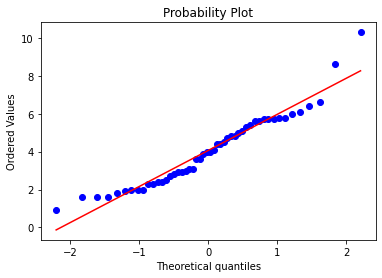

In [21]:
from scipy.stats import probplot
import pylab
probplot(state['Murder.Rate'], dist="norm", plot=pylab)
plt.show()


## 1.3 범주형 데이터의 요약

### 도수분포표 (Frequency table)
- 각 범주에 해당하는 데이터의 개수를 표로 요약 


#### Example: Loan 
- P2P 방식의 대출 사업을 선도하고 있는 Lending Club에서 제공하는 데이터
- 대출등급(grade): A-G
- 대출상환 상태(status): Fully paid(전액 상환), Current(진행 중), Late(연체), Charged off(삭제: 대출 잔여금 회수 불능) 

In [23]:
lc_loans = pd.read_csv('data/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [24]:
lc_loans.status.value_counts(sort=False)

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

In [25]:
lc_loans.status= lc_loans.status.astype('category')

In [26]:
lc_loans.status.cat.categories

Index(['Charged Off', 'Current', 'Fully Paid', 'Late'], dtype='object')

In [34]:
# # 카테고리 순서 조정 (WRONG!!!!)
# lc_loans.status= lc_loans.status.astype('category')
# lc_loans.status.cat.categories = ['Fully Paid', 'Current','Late', 'Charged Off' ]
# lc_loans.status.value_counts(sort=False)

In [27]:
### 수정된 코드
lc_loans.status = lc_loans.status.cat.reorder_categories(['Fully Paid', 'Current','Late', 'Charged Off' ])
lc_loans.status.value_counts(sort=False)

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

### 막대도표 (Bar plot)
- 도수분포표의 값을 막대기의 높이로 표현하여 시각화

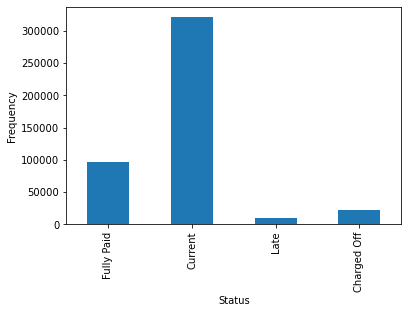

In [28]:
ax = lc_loans.status.value_counts(sort=False).plot.bar()
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()


### 원 그래프 (Pie chart) 
- 도수분포표의 빈도의 비율을 부채꼴 모양으로 나타낸 그래프 

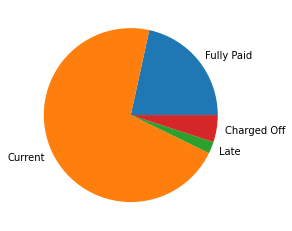

In [29]:
ax = lc_loans.status.value_counts(sort=False).plot.pie()
ax.set_ylabel('')
plt.show()

## 1.4 두 변수의 관계 요약
### 1.4.1 두 범주형 변수의 관계

#### 분할표 (Cross table)
- 두 범주형 변수에 의해 생성되는 범주별 빈도수를 기록한 테이블 

In [30]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True)

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,20408,31160,23147,13681,5949,2328,643,97316
Current,50051,93852,88928,53281,24639,8444,1990,321185
Late,469,2056,2777,2308,1374,606,199,9789
Charged Off,1562,5302,6023,5007,2842,1526,409,22671
All,72490,132370,120875,74277,34804,12904,3241,450961


In [31]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'index')

grade,A,B,C,D,E,F,G
status,,,,,,,
Fully Paid,0.209709,0.320194,0.237854,0.140583,0.061131,0.023922,0.006607
Current,0.155832,0.292205,0.276875,0.165889,0.076713,0.026290,0.006196
Late,0.047911,0.210032,0.283686,0.235775,0.140362,0.061906,0.020329
Charged Off,0.068899,0.233867,0.265670,0.220855,0.125358,0.067311,0.018041
All,0.160746,0.293529,0.268039,0.164708,0.077177,0.028614,0.007187


In [32]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'columns')

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,0.281528,0.235401,0.191495,0.184189,0.170929,0.180409,0.198396,0.215797
Current,0.690454,0.709013,0.735702,0.717328,0.707936,0.654371,0.614008,0.712223
Late,0.006470,0.015532,0.022974,0.031073,0.039478,0.046962,0.061401,0.021707
Charged Off,0.021548,0.040054,0.049828,0.067410,0.081657,0.118258,0.126196,0.050273


#### Mosaic plot
- 분할표에서 각 범주의 비율을 상자의 너비와 높이로 표현하여 비교하는 그래프
- Grade가 높을 수록 Fully Paid의 비율이 높은 것을 확인 가능

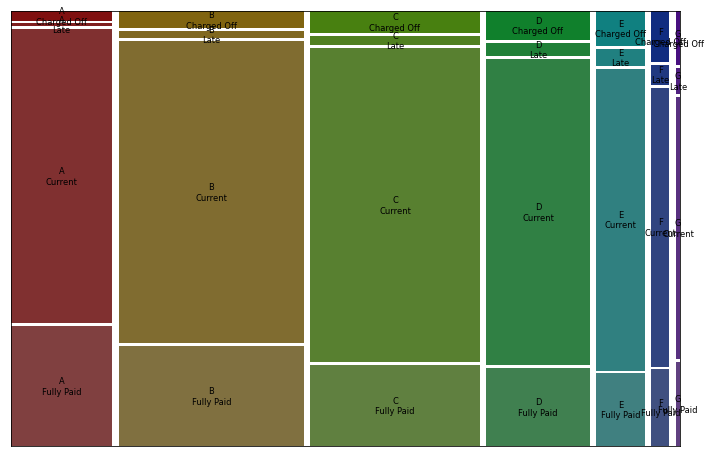

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [12, 8]
mosaic(lc_loans.sort_values('grade'), ['grade', 'status'],axes_label=False, gap=0.01)
plt.show()

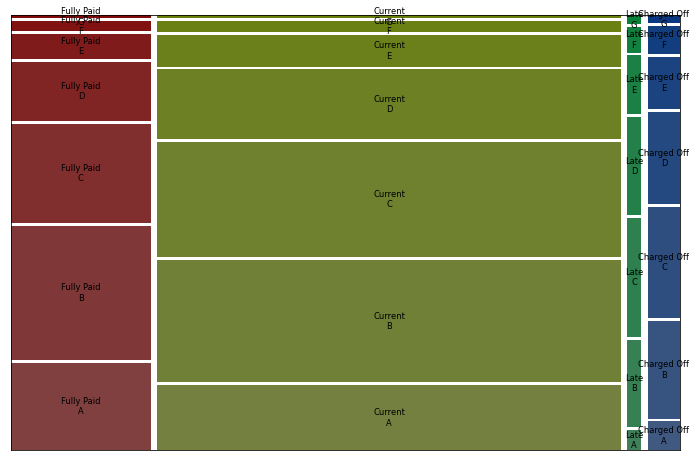

In [34]:
mosaic(lc_loans.sort_values('grade'), [ 'status', 'grade'],axes_label=False, gap=0.01)
plt.show()


### 1.4.2 범주형 변수와 수치형 변수 
#### Example: 항공기 지연 
- 일간 비행 지연 비율을 한 달간 기록한 데이터 
- 각 범주에 해당하는 수치형 변수의 상자그림을 통해 비교 


In [45]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


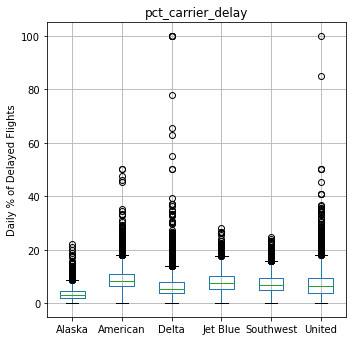

In [46]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

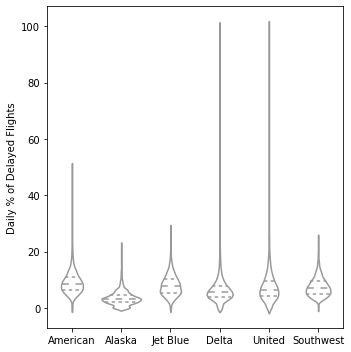

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 1.4.3 두 수치형 변수의 관계 
#### Example: S&P 500 주식 수익 
- `sp500_sectors.csv': S&P 500에 포함된 종목의 섹터와 symbol 데이터
- `sp500_data.csv.gz': S&P 500 종목의 일간 수익률

In [55]:
sp500_sym = pd.read_csv('data/sp500_sectors.csv')
sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)

sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [56]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


- 통신사 주식만 골라냄

In [57]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


- ETF 종목만 골라냄

In [58]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

#### 상관관계 
- 한 변수가 큰 값을 가질 때 다른 변수도 큰 값을 갖는가? (양의 상관관계) 
- 아니면 오히려 작은 값을 갖는가? (음의 상관관계) 
- 아니면 아무런 관계가 없는가? (상관관계 없음) 

#### 공분산 (Covariance)

$$ cov(x,y)=\frac{\sum_i (x_i- \bar x) (y_i - \bar y )}{n-1} $$

- 두 변수가 같은 방향으로 움직이는 정도를 측정
- 측정단위에 영향을 받음 (kg vs g, km vs mile)

#### (Pearson) 상관계수 
$$cor(x,y)= \frac{cov(x,y)}{sd(x)sd(y)}$$
- 표준편차로 나누어 주어 언제나 -1과 1 사이의 값을 가진다.

- Pearson 상관계수의 특징
    - 직선관계의 정도를 나타낸다.
    - cor>0: 같은 방향으로 움직이는 경향
    - cor<0: 반대 방향으로 움직이는 경향 
    - $\pm 1$에 가까울 수록 (즉, 절대값이 클수록) 강한 상관관계
        - cor=1: 완벽한 직선관계를 의미 
        - cor=0에 가까울 수록 관계없음


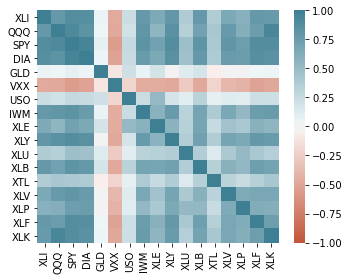

In [59]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

- S&P500(SPY)와 다우 존스 지수(DIA)와 높은 상관성을 갖는다. 
- 주로 첨단 기술 회사들로 이루어진  QQQ와 XLK 간의 양의 상관관계가 있다. 
- 금값(GLD), 유가(USO), 시장변동성(VXX)은 다른 ETF들과 약한 상관관계 혹은 음의 상관관계를 갖는다. 

#### 산점도 (Scatter plot)
- 두 수치형 변수 사이의 관계를 시각화 하는 가장 기본적인 그래프 
- x, y축은 각 변수를 의미 
- 각 점은 하나의 데이터 포인트

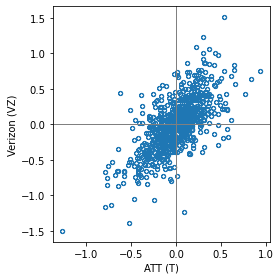

In [60]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()